In [360]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

file = 'pred_2028Medal_byGB.csv'
df1 = pd.read_csv(
    file,
    encoding='utf-8',
    encoding_errors='ignore'  # 忽略解码错误
)
df1.columns

Index(['Unnamed: 0', 'NOC', 'Total', 'Gold', 'Silver', 'Bronze'], dtype='object')

In [362]:
df1 = df1.round()
df1['Sum'] = df1[['Gold', 'Silver', 'Bronze']].sum(axis=1)
df1 = df1.sort_values(by=['Sum','Gold'], ascending=[False,False])
df1 = df1[['NOC', 'Gold', 'Silver', 'Bronze', 'Total', 'Sum']]
df1

,NOC,Gold,Silver,Bronze,Total,Sum
197,USA,43.0,39.0,39.0,116.0,121.0
65,FRA,30.0,28.0,23.0,78.0,81.0
38,CHN,28.0,23.0,30.0,86.0,81.0
11,AUS,30.0,20.0,24.0,75.0,74.0
97,JPN,22.0,20.0,22.0,67.0,64.0
...,...,...,...,...,...,...
200,VEN,0.0,0.0,0.0,0.0,0.0
201,VIE,0.0,0.0,0.0,0.0,0.0
202,VIN,0.0,0.0,0.0,0.0,0.0
203,YEM,0.0,0.0,0.0,0.0,0.0


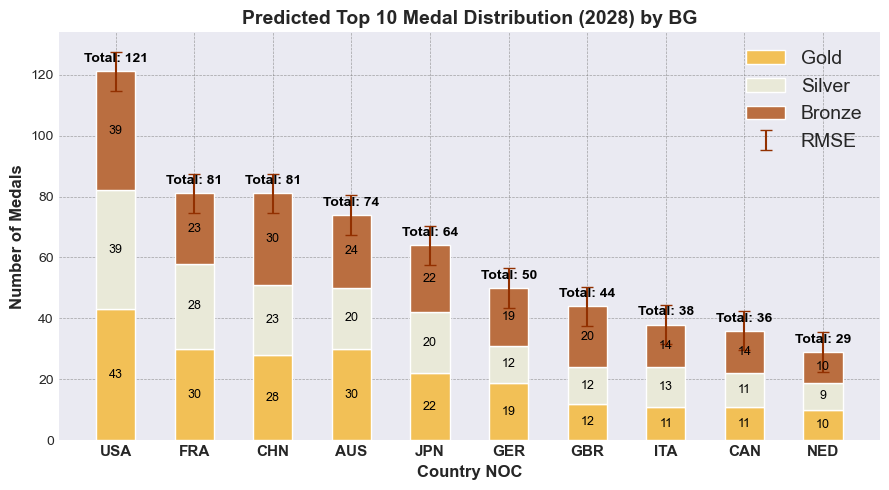

In [368]:
# 假设你的数据存储在 df1 中，包含 Predicted_Gold, Predicted_Silver, Predicted_Bronze 列
countries = df1['NOC'].head(10)  # 国家
data = df1[df1['NOC'].isin(countries)]
rmse = 6.461609 

# 提取数据并保留整数（四舍五入）
x = np.arange(len(countries))
gold = np.round(data['Gold'].values)
silver = np.round(data['Silver'].values)
bronze = np.round(data['Bronze'].values)
total = gold + silver + bronze

# 设置风格
plt.style.use('seaborn-v0_8-darkgrid')  # 使用 Matplotlib 提供的兼容样式


# 创建堆叠柱状图
plt.figure(figsize=(9, 5))
bars1 = plt.bar(x, gold, label='Gold', color='#F2C056', edgecolor='white', width=0.5)
bars2 = plt.bar(x, silver, bottom=gold, label='Silver', color='#E9E9D8', edgecolor='white', width=0.5)
bars3 = plt.bar(x, bronze, bottom=gold + silver, label='Bronze', color='#BA6E40', edgecolor='white', width=0.5)

# 添加每部分的数值标签
for i in range(len(x)):
    plt.text(x[i], gold[i] / 2, f'{gold[i]:.0f}', ha='center', va='center', fontsize=9, color='black')  # Gold 标签
    plt.text(x[i], gold[i] + silver[i] / 2, f'{silver[i]:.0f}', ha='center', va='center', fontsize=9, color='black')  # Silver 标签
    plt.text(x[i], gold[i] + silver[i] + bronze[i] / 2, f'{bronze[i]:.0f}', ha='center', va='center', fontsize=9, color='black')  # Bronze 标签

# 添加总数值标签
for i in range(len(x)):
    plt.text(x[i], total[i] + 2, f'Total: {total[i]:.0f}', ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# 添加误差条
plt.errorbar(x, total, yerr=rmse, fmt='none', ecolor='#923000', capsize=4, label='RMSE')

# 添加标签和标题
plt.xticks(x, countries, fontsize=11, fontweight='bold')
plt.yticks(fontsize=10)
plt.xlabel('Country NOC', fontsize=12, fontweight='bold')
plt.ylabel('Number of Medals', fontsize=12, fontweight='bold')
plt.title('Predicted Top 10 Medal Distribution (2028) by BG', fontsize=14, fontweight='bold')
plt.legend(fontsize=14, loc='upper right')

# 调整网格样式
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()

plt.savefig("fig/Pred_Top10_GB.png")

# 显示图表
plt.show()

In [344]:
file = 'pred_2028Medal_byARIMA.csv'
df2 = pd.read_csv(
    file,
    encoding='utf-8',
    encoding_errors='ignore'  # 忽略解码错误
)
df2.columns

Index(['NOC', 'Gold', 'Silver', 'Bronze', 'Total', 'Sum'], dtype='object')

In [345]:
df2 = df2.round()
df2['Sum'] = df2[['Gold', 'Silver', 'Bronze']].sum(axis=1)
df2 = df2.sort_values(by=['Sum','Gold'], ascending=[False,False])
df2

,NOC,Gold,Silver,Bronze,Total,Sum
219,USA,120,107,81,326,308
71,FRA,80,96,39,160,215
42,CHN,76,68,38,184,182
81,GER,42,32,69,113,143
76,GBR,38,41,63,144,142
...,...,...,...,...,...,...
225,VNM,0,0,0,0,0
226,WIF,0,0,0,0,0
227,YAR,0,0,0,0,0
228,YEM,0,0,0,0,0


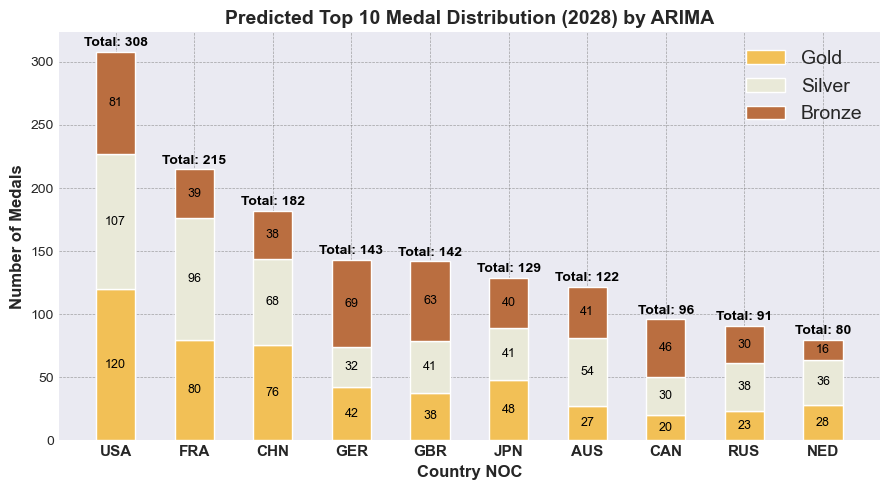

In [346]:
# 假设你的数据存储在 df2 中，包含 Predicted_Gold, Predicted_Silver, Predicted_Bronze 列
countries = df2['NOC'].head(10)  # 国家
data = df2[df2['NOC'].isin(countries)]

# 提取数据并保留整数（四舍五入）
x = np.arange(len(countries))
gold = np.round(data['Gold'].values)
silver = np.round(data['Silver'].values)
bronze = np.round(data['Bronze'].values)
total = gold + silver + bronze

# 设置风格
plt.style.use('seaborn-v0_8-darkgrid')  # 使用 Matplotlib 提供的兼容样式


# 创建堆叠柱状图
plt.figure(figsize=(9, 5))
bars1 = plt.bar(x, gold, label='Gold', color='#F2C056', edgecolor='white', width=0.5)
bars2 = plt.bar(x, silver, bottom=gold, label='Silver', color='#E9E9D8', edgecolor='white', width=0.5)
bars3 = plt.bar(x, bronze, bottom=gold + silver, label='Bronze', color='#BA6E40', edgecolor='white', width=0.5)

# 添加每部分的数值标签
for i in range(len(x)):
    plt.text(x[i], gold[i] / 2, f'{gold[i]:.0f}', ha='center', va='center', fontsize=9, color='black')  # Gold 标签
    plt.text(x[i], gold[i] + silver[i] / 2, f'{silver[i]:.0f}', ha='center', va='center', fontsize=9, color='black')  # Silver 标签
    plt.text(x[i], gold[i] + silver[i] + bronze[i] / 2, f'{bronze[i]:.0f}', ha='center', va='center', fontsize=9, color='black')  # Bronze 标签

# 添加总数值标签
for i in range(len(x)):
    plt.text(x[i], total[i] + 2, f'Total: {total[i]:.0f}', ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# 添加标签和标题
plt.xticks(x, countries, fontsize=11, fontweight='bold')
plt.yticks(fontsize=10)
plt.xlabel('Country NOC', fontsize=12, fontweight='bold')
plt.ylabel('Number of Medals', fontsize=12, fontweight='bold')
plt.title('Predicted Top 10 Medal Distribution (2028) by ARIMA', fontsize=14, fontweight='bold')
plt.legend(fontsize=14, loc='upper right')

# 调整网格样式
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()

plt.savefig("fig/Pred_Top10_ARIMA.png")

# 显示图表
plt.show()

In [347]:
df2 = df2[df2['NOC'].isin(df1['NOC'])]
df1 = df1[df1['NOC'].isin(df2['NOC'])]
df2 = df2.sort_values(by=['NOC']).reset_index(drop=True)
df1 = df1.sort_values(by=['NOC']).reset_index(drop=True)
print(df1)
print(df2)
noc = df1['NOC']
df1 = df1[['Gold', 'Silver', 'Bronze', 'Total', 'Sum']].reset_index(drop=True)
df2 = df2[['Gold', 'Silver', 'Bronze', 'Total', 'Sum']].reset_index(drop=True)
print(df1)
print(df2)
df = df1 * 0.8 + df2 * 0.1
print(df)
df['NOC'] = noc
df = df.round()
df['Sum'] = df[['Gold', 'Silver', 'Bronze']].sum(axis=1)
df = df.sort_values(by=['Sum','Gold'], ascending=[False,False])
df.to_csv("pred_2028Medal_byMix.csv")
df

     NOC  Gold  Silver  Bronze  Total  Sum
0    AFG   0.0     0.0     0.0    0.0  0.0
1    AIN   0.0     0.0     0.0    1.0  0.0
2    ALB   0.0     1.0     1.0    2.0  2.0
3    ALG   1.0     1.0     2.0    4.0  4.0
4    AND   0.0     0.0     0.0    0.0  0.0
..   ...   ...     ...     ...    ...  ...
200  VIE   0.0     0.0     0.0    0.0  0.0
201  VIN   0.0     0.0     0.0    0.0  0.0
202  YEM   0.0     0.0     0.0    0.0  0.0
203  ZAM   0.0     0.0     1.0    1.0  1.0
204  ZIM   0.0     0.0     0.0    0.0  0.0

[205 rows x 6 columns]
     NOC  Gold  Silver  Bronze  Total  Sum
0    AFG     0       0       0      0    0
1    AIN     1       4       1      6    6
2    ALB     0       0       2      2    2
3    ALG     1       1       0      2    2
4    AND     0       0       0      0    0
..   ...   ...     ...     ...    ...  ...
200  VIE     0       0       0      1    0
201  VIN     0       0       0      0    0
202  YEM     0       0       0      0    0
203  ZAM     0       0       1

,Gold,Silver,Bronze,Total,Sum,NOC
196,46.0,42.0,39.0,125.0,127.0,USA
65,32.0,32.0,22.0,78.0,86.0,FRA
38,30.0,25.0,28.0,87.0,83.0,CHN
11,27.0,21.0,23.0,72.0,71.0,AUS
97,22.0,20.0,22.0,64.0,64.0,JPN
...,...,...,...,...,...,...
199,0.0,0.0,0.0,0.0,0.0,VEN
200,0.0,0.0,0.0,0.0,0.0,VIE
201,0.0,0.0,0.0,0.0,0.0,VIN
202,0.0,0.0,0.0,0.0,0.0,YEM


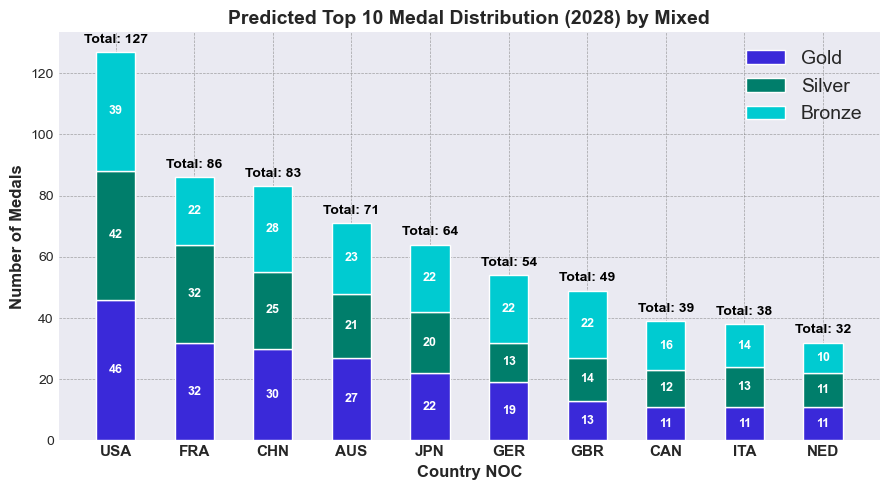

In [348]:
countries = df['NOC'].head(10)  # 国家
data = df[df['NOC'].isin(countries)]

# 提取数据并保留整数（四舍五入）
x = np.arange(len(countries))
gold = np.round(data['Gold'].values)
silver = np.round(data['Silver'].values)
bronze = np.round(data['Bronze'].values)
total = gold + silver + bronze

# 设置风格
plt.style.use('seaborn-v0_8-darkgrid')  # 使用 Matplotlib 提供的兼容样式


# 创建堆叠柱状图
plt.figure(figsize=(9, 5))
bars1 = plt.bar(x, gold, label='Gold', color='#3A29D9', edgecolor='white', width=0.5)
bars2 = plt.bar(x, silver, bottom=gold, label='Silver', color='#007E6B', edgecolor='white', width=0.5)
bars3 = plt.bar(x, bronze, bottom=gold + silver, label='Bronze', color='#00CBD1', edgecolor='white', width=0.5)
# bars1 = plt.bar(x, gold, label='Gold', color='#F2C056', edgecolor='white', width=0.5)
# bars2 = plt.bar(x, silver, bottom=gold, label='Silver', color='#E9E9D8', edgecolor='white', width=0.5)
# bars3 = plt.bar(x, bronze, bottom=gold + silver, label='Bronze', color='#BA6E40', edgecolor='white', width=0.5)

# 添加每部分的数值标签
for i in range(len(x)):
    plt.text(x[i], gold[i] / 2, f'{gold[i]:.0f}', ha='center', va='center', fontsize=9, color='white', fontweight='bold')  # Gold 标签
    plt.text(x[i], gold[i] + silver[i] / 2, f'{silver[i]:.0f}', ha='center', va='center', fontsize=9, color='white', fontweight='bold')  # Silver 标签
    plt.text(x[i], gold[i] + silver[i] + bronze[i] / 2, f'{bronze[i]:.0f}', ha='center', va='center', fontsize=9, color='white', fontweight='bold')  # Bronze 标签

# 添加总数值标签
for i in range(len(x)):
    plt.text(x[i], total[i] + 2, f'Total: {total[i]:.0f}', ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# 添加标签和标题
plt.xticks(x, countries, fontsize=11, fontweight='bold')
plt.yticks(fontsize=10)
plt.xlabel('Country NOC', fontsize=12, fontweight='bold')
plt.ylabel('Number of Medals', fontsize=12, fontweight='bold')
plt.title('Predicted Top 10 Medal Distribution (2028) by Mixed', fontsize=14, fontweight='bold')
plt.legend(fontsize=14, loc='upper right')

# 调整网格样式
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()

plt.savefig("fig/Pred_Top10_Mix.png")

# 显示图表
plt.show()